<a href="https://colab.research.google.com/github/Shahzodgithub/data_science_practice/blob/main/Simple_LR_sales_on_mass_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.shape

(200, 4)

In [48]:
df.corrwith(df['Sales'])

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
dtype: float64

**Ko'rinib turibdiki TV Savdo oshishiga ancha yaxshi ta'sir ko'rsatadi**

In [53]:
df['TV'].mean()

147.0425

In [54]:
df_new = df[df.TV>100]
df_new

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
7    120.2   19.6       11.6   13.2
9    199.8    2.6       21.2   15.6
..     ...    ...        ...    ...
193  166.8   42.0        3.6   19.6
194  149.7   35.6        6.0   17.3
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[130 rows x 4 columns]

In [55]:
X = df_new['TV'].to_numpy()
X

array([230.1, 151.5, 180.8, 120.2, 199.8, 214.7, 204.1, 195.4, 281.4,
       147.3, 218.4, 237.4, 228.3, 262.9, 142.9, 240.1, 248.8, 292.9,
       112.9, 265.6, 290.7, 266.9, 228. , 202.5, 177. , 293.6, 206.9,
       175.1, 239.9, 227.2, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
       136.2, 210.8, 210.7, 261.3, 239.3, 102.7, 131.1, 139.3, 237.4,
       216.8, 199.1, 109.8, 129.4, 213.4, 120.5, 116. , 239.8, 213.5,
       193.2, 110.7, 109.8, 134.3, 217.7, 250.9, 107.4, 163.3, 197.6,
       184.9, 289.7, 135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,
       255.4, 225.8, 241.7, 175.7, 209.6, 139.2, 125.7, 141.3, 224. ,
       123.1, 229.5, 220.3, 265.2, 219.8, 273.7, 184.9, 193.7, 220.5,
       104.6, 140.3, 240.1, 243.2, 280.7, 121. , 197.6, 171.3, 187.8,
       149.8, 131.7, 172.5, 188.4, 163.5, 117.2, 234.5, 206.8, 215.4,
       284.3, 164.5, 168.4, 222.4, 276.9, 248.4, 170.2, 276.7, 165.6,
       156.6, 218.5, 287.6, 253.8, 205. , 139.5, 191.1, 286. , 166.8,
       149.7, 177. ,

In [56]:
y = df_new['Sales'].to_numpy()
y

array([22.1, 16.5, 17.9, 13.2, 15.6, 17.4, 19. , 22.4, 24.4, 14.6, 18. ,
       17.5, 20.5, 17. , 15. , 20.9, 18.9, 21.4, 11.9, 17.4, 17.8, 25.4,
       21.5, 16.6, 17.1, 20.7, 17.9, 16.1, 23.2, 19.8, 16.4, 10.7, 22.6,
       21.2, 20.2, 23.7, 13.2, 23.8, 18.4, 24.2, 20.7, 14. , 16. , 13.4,
       18.9, 22.3, 18.3, 12.4, 11. , 17. , 14.2, 11. , 17.3, 21.7, 20.2,
       16. , 16.7, 14. , 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4, 17.2,
       16.7, 23.8, 19.8, 19.7, 20.7, 15. , 19.8, 18.4, 21.8, 17.1, 20.9,
       12.2, 15.9, 15.5, 16.6, 15.2, 19.7, 24.7, 17.7, 19.6, 20.8, 20.7,
       19.2, 20.1, 10.4, 10.3, 18.2, 25.4, 16.1, 11.6, 16.6, 16. , 20.6,
       10.1, 12.9, 16.4, 19.9, 18. , 11.9, 16.9, 17.2, 17.1, 20. , 17.5,
       16.7, 16.5, 27. , 20.2, 16.7, 16.8, 17.6, 15.5, 17.2, 26.2, 17.6,
       22.6, 10.3, 17.3, 20.9, 19.6, 17.3, 14.8, 25.5, 18.4])

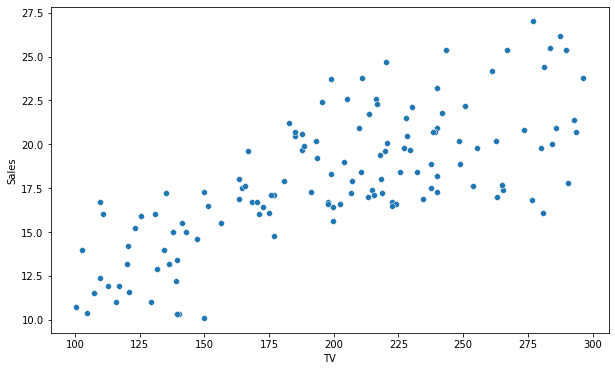

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_new, x='TV', y='Sales')
plt.show()

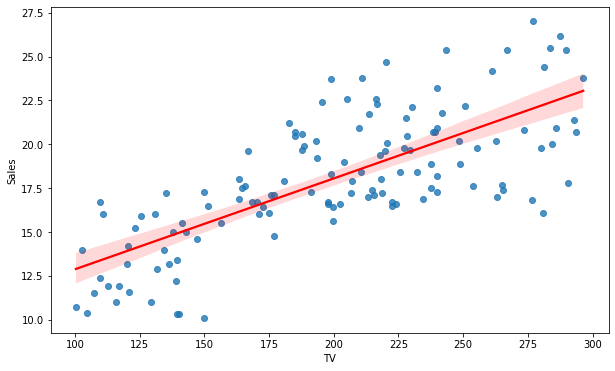

In [60]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_new, x='TV', y='Sales', line_kws={"color": "red"})
plt.show()

In [61]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y)

In [62]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
theta1

0.05179458905978053

In [63]:
theta0 = ymean - theta1*Xmean
theta0

7.694655734357372

In [77]:
x_test = df_new.sample(10, random_state=22)['TV'].to_numpy()
print(f"{x_test}")
y_test = df_new.sample(10, random_state=22)['Sales'].to_numpy()
print(f"{y_test}")

[165.6 219.8 209.6 193.2 238.2 225.8 198.9 283.6 240.1 280.7]
[17.6 19.6 20.9 20.2 20.7 18.4 23.7 25.5 18.2 16.1]


In [78]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict}")

[16.24337843 19.07458467 18.54177464 17.68509969 20.03573217 19.38800233
 17.98284647 22.40725916 20.1349811  22.25577396]


In [79]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"'MAE': {MAE}")# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"'RMSE': {RMSE}")

'MAE': 2.5308082154376317
'RMSE': 3.151323997524193


# Scikit-learn yordamida LR

In [68]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_new, test_size=0.10, random_state=22)

In [80]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz 
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1}')
print (f'{theta0}')

0.0522362773628904
7.593050902973081


Text(0, 0.5, 'Sales')

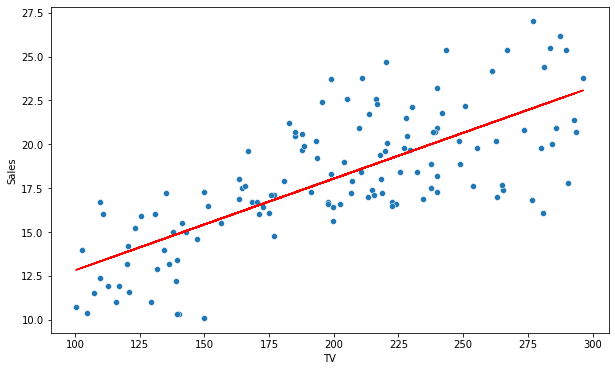

In [81]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_new, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("TV")
plt.ylabel("Sales")

In [82]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [83]:
y_predict = LR_model.predict(x_test)

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"'MAE': {MAE}")
print(f"'RMSE': {RMSE}")

'MAE': 2.363777148541662
'RMSE': 2.912978079097213
